In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
fichier = pd.read_csv("twittercomment.csv", engine = 'python')
fichier

,label,tweet_id,date,query,user_name,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Attention 512s.

In [106]:
fichier['Month'] = pd.DatetimeIndex(fichier['date']).month
fichier['year'] = pd.DatetimeIndex(fichier['date']).year

C:\Users\benpr\AppData\Roaming\Python\Python39\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [107]:
#fichier['hours'] = pd.DatetimeIndex(fichier['date']).hours
#fichier['hours'] = fichier.index.to_series().apply(lambda x: x.hour))
#fichier['hour'] = fichier.index.hour
#fichier['hour'] = fichier['date'].dt.hour
#fichier['hours'] = pd.to_datetime(fichier['date'], errors='coerce')
#fichier['hours'] = pd.to_datetime(fichier['date'], format='H')
#fichier['hours'] = fichier['date'].dt.strftime('%Y-%m-%d %H')
#fichier['hour'] = pd.to_datetime(fichier['hours'] ,errors = 'coerce',format = '%Y-%m-%d %H').dt.strftime("%H%")

Les sentiments négatifs ont la valeurs -1.

In [108]:
fichier['label'] = fichier['label'].replace(4,-1)

In [109]:
fichier.head()

,label,tweet_id,date,query,user_name,text,Month,year
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",4,2009
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,4,2009
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,4,2009
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,4,2009
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",4,2009


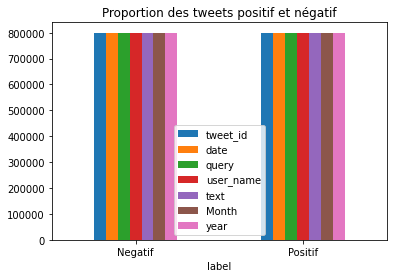

In [110]:
ax = fichier.groupby('label').count().plot(kind='bar', title='Proportion des tweets positif et négatif',legend=True)
ax.set_xticklabels(['Negatif','Positif'], rotation=0)
text, sentiment = list(fichier['text']), list(fichier['label'])

<AxesSubplot:xlabel='label', ylabel='count'>

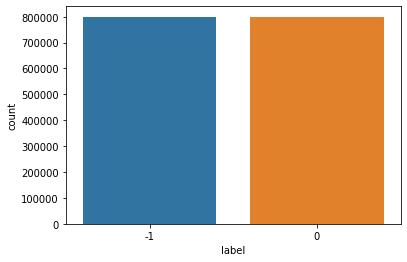

In [111]:
import seaborn as sns
sns.countplot(x='label', data=fichier)

**Data Preprocessing**

C:\Users\benpr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

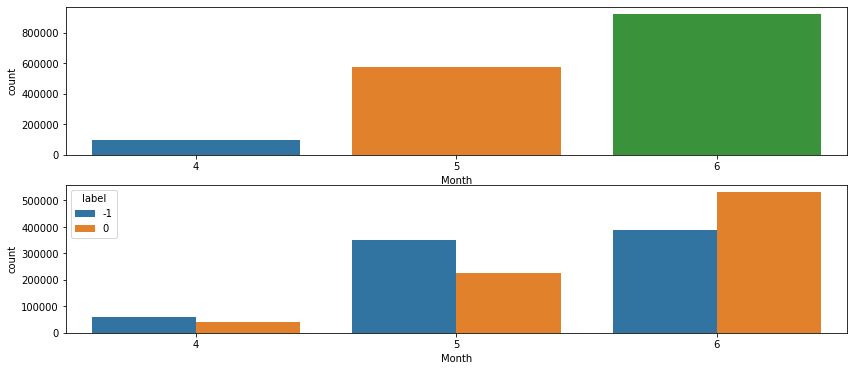

In [112]:
plt.figure(figsize=(14,6))
plt.subplot(211)
sns.countplot("Month",data=fichier)
plt.subplot(212)
sns.countplot(x= "Month",hue='label',data=fichier)

C:\Users\benpr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

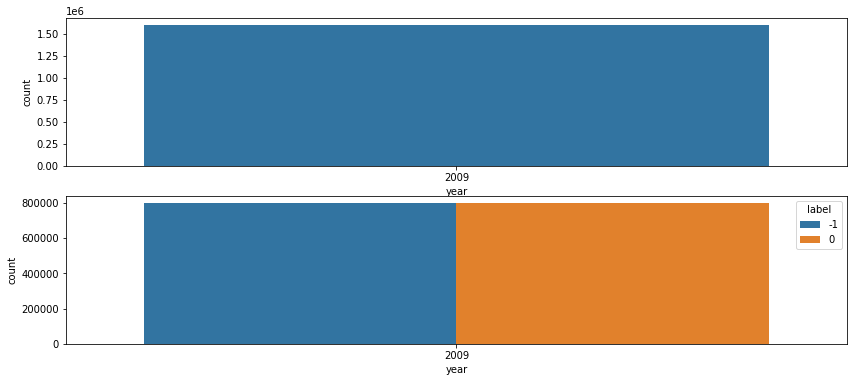

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.subplot(211)
sns.countplot("year",data=fichier)
plt.subplot(212)
sns.countplot(x= "year",hue='label',data=fichier)

C:\Users\benpr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'weekday'

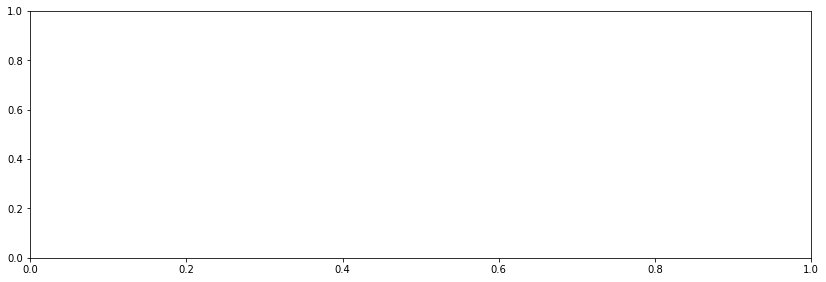

In [114]:
plt.figure(figsize=(14,10))
plt.subplot(211)
sns.countplot("weekday",data=fichier)
plt.subplot(212)
sns.countplot(x= "weekday",hue='label',data=fichier)